# Homework 2
Team: <br/>
Sreenivasan Ramesh       1217310193<br/>
Tanush Vinay             1217104733<br/>
Paarvendhan Puviyarasu   1217390616<br/>
Muskan Singhal           1217107320<br/>
## Exercise 1a)

            class 1: x1 =(1,0) and x2 =(−1,0), class 2: x3 =(0,1) and x4 =(0,−1). 
            Find some parameters b1, b2, W1 and W2 such that the scores s satisfy: s1 > s2 for x1 and x2 , 
            s1 < s2 for x3 and x4.

In [163]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import gc



In [166]:

#to clear previous TF cached graph
gc.collect()

x = np.array([[1,0], [-1,0], [0,1], [0,-1]]) #X1, X2, X3, X4
y = np.array([[1,0], [1,0], [0,1], [0,1]])   #S1, S1, S2, S2


#model
model = Sequential()
model.add(Dense(2, input_shape = (2, ), activation = 'relu', kernel_initializer='glorot_uniform'))
model.add(Dense(2, kernel_initializer='glorot_uniform'))

#training the model
print('training...')
optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=None)
model.fit(x, y, epochs=10000, verbose=0)

#Get Weights and biases of layer 1
weights_1 = model.layers[0].get_weights()[0]
biases_1 = model.layers[0].get_weights()[1]

#Get Weights and biases of layer 2
weights_2 = model.layers[1].get_weights()[0]
biases_2 = model.layers[1].get_weights()[1]


print("\nWeights for layer1:\n",weights_1)
print("Biases  for layer1:\n",biases_1,"\n")
print("Weights for layer2:\n",weights_2)
print("Biases  for layer2:\n",biases_2,"\n")



print("Score[s1, s2] for X1 [ 1,0]: ",model.predict(np.array([x[0]])),"\n")
print("Score[s1, s2] for X2 [-1,0]: ",model.predict(np.array([x[1]])),"\n")
print("Score[s1, s2] for X3 [ 0,1]: ",model.predict(np.array([x[2]])),"\n")
print("Score[s1, s2] for X4 [ 0,-1]: ",model.predict(np.array([x[3]])),"\n")

del model
gc.collect()

training...

Weights for layer1:
 [[-0.003658    0.07710768]
 [-0.9864182   1.1059409 ]]
Biases  for layer1:
 [-0.01172367 -0.08303766] 

Weights for layer2:
 [[-1.0300847   1.0292103 ]
 [-0.97574717  0.97645986]]
Biases  for layer2:
 [ 0.9999333  -0.00158343] 

Score[s1, s2] for X1 [ 1,0]:  [[ 0.9999333  -0.00158343]] 

Score[s1, s2] for X2 [-1,0]:  [[ 0.9999333  -0.00158343]] 

Score[s1, s2] for X3 [ 0,1]:  [[0.00183827 0.9972406 ]] 

Score[s1, s2] for X4 [ 0,-1]:  [[-0.00408465  1.0015821 ]] 



7611

### Note:

One of the outputs we got:<br/><br/>
```
Weights for layer1:
 [[ 0.05851737  0.00580344]
 [-1.7882288   0.85562503]]
Biases  for layer1:
 [-0.71792585 -0.13241728] 

Weights for layer2:
 [[-0.95510155  0.9616221 ]
 [-1.418329    1.3993654 ]]
Biases  for layer2:
 [ 1.012325   -0.01103757] 

Score[s1, s2] for X1 [ 1,0]:  [[ 1.012325   -0.01103757]] 

Score[s1, s2] for X2 [-1,0]:  [[ 1.012325   -0.01103757]] 

Score[s1, s2] for X3 [ 0,1]:  [[-0.01342154  1.0009943 ]] 

Score[s1, s2] for X4 [ 0,-1]:  [[-0.00992298  1.0181894 ]] 
```


## Exercise 1b)
            
Train a two-layer neural network to classify the points. Provide the accuracy of the model(percentage of correctly predicted labels). We used one hot encoding to modify the class. 

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 2)                 6         
_________________________________________________________________
dense_122 (Dense)            (None, 2)                 6         
_________________________________________________________________
dense_123 (Dense)            (None, 3)                 9         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 684us/step
Test Accuracy: 95.00


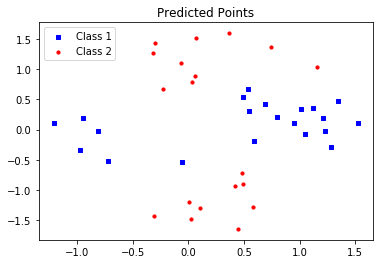

6107

In [177]:
#Shuffle Dataset
df = pd.read_csv('data_HW2_ex1.csv').sample(frac=1).reset_index(drop=True)

#Split into Features and Classes
x = np.column_stack((df['x1'].values,df['x2'].values))
y = df['class'].values

#One Hot Encoding 
#[0,1,0] ---> Class 1
#[0,0,1] ---> Class 2
y = to_categorical(y)

#Train-Test Split ---> 80:20
x_train = x[:int(0.8*len(x))]
x_test = x[int(0.8*len(x)):]
y_train = y[:int(0.8*len(y))]
y_test = y[int(0.8*len(y)):]




#Define the fully connected model
#We are using 2-4-3(Input,Hidden and Output Layer Nodes) 
#Hidden Layer Activation ---> Relu
#Output Layer Activation ---> Softmax 

model = Sequential()
model.add(Dense(2,input_shape = (2,)))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#Summarise the Model Arch 
model.summary()

#Train Model
model.fit(x_train, y_train, epochs=1000, verbose=0)

#Evaluate the keras model for its Test Accuracy
score, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy: %.2f' % (accuracy*100))

class_1x = []
class_2x = []
class_2y = []
class_1y = []
predicted_op = model.predict(x_test)
for i in range(len(predicted_op)):
    if np.argmax(predicted_op[i]) == 1:
        class_1x.append(x_test[i][0])
        class_1y.append(x_test[i][1])
    else:
        class_2x.append(x_test[i][0])
        class_2y.append(x_test[i][1])

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(class_1x, class_1y, s=10, c='b', marker="s", label='Class 1')
ax1.scatter(class_2x,class_2y, s=10, c='r', marker="o", label='Class 2')
plt.title("Predicted Points")
plt.legend(loc='upper left');
plt.show()

gc.collect()

### Note:
Using more nodes (larger layer) in the hidden layer gives better results for 1b

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_130 (Dense)            (None, 2)                 6         
_________________________________________________________________
dense_131 (Dense)            (None, 5)                 15        
_________________________________________________________________
dense_132 (Dense)            (None, 3)                 18        
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 687us/step
Test Accuracy: 96.67


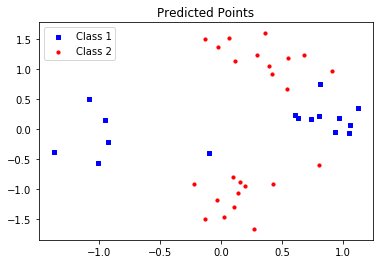

6049

In [180]:
### 2b - using more nodes ###
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
import gc
import matplotlib.pyplot as plt





#Shuffle Dataset
df = pd.read_csv('data_HW2_ex1.csv').sample(frac=1).reset_index(drop=True)

#Split into Features and Classes
x = np.column_stack((df['x1'].values,df['x2'].values))
y = df['class'].values

#One Hot Encoding 
#[0,1,0] ---> Class 1
#[0,0,1] ---> Class 2
y = to_categorical(y)

#Train-Test Split ---> 80:20
x_train = x[:int(0.8*len(x))]
x_test = x[int(0.8*len(x)):]
y_train = y[:int(0.8*len(y))]
y_test = y[int(0.8*len(y)):]




#Define the fully connected model
#We are using 2-4-3(Input,Hidden and Output Layer Nodes) 
#Hidden Layer Activation ---> Relu
#Output Layer Activation ---> Softmax 

model = Sequential()
model.add(Dense(2,input_shape = (2,)))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
optimizer = keras.optimizers.Adam(learning_rate=0.05)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#Summarise the Model Arch 
model.summary()

#Train Model
model.fit(x_train, y_train, epochs=500, verbose=0)

#Evaluate the keras model for its Test Accuracy
score, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy: %.2f' % (accuracy*100))

class_1x = []
class_2x = []
class_2y = []
class_1y = []
predicted_op = model.predict(x_test)
for i in range(len(predicted_op)):
    if np.argmax(predicted_op[i]) == 1:
        class_1x.append(x_test[i][0])
        class_1y.append(x_test[i][1])
    else:
        class_2x.append(x_test[i][0])
        class_2y.append(x_test[i][1])

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(class_1x, class_1y, s=10, c='b', marker="s", label='Class 1')
ax1.scatter(class_2x,class_2y, s=10, c='r', marker="o", label='Class 2')
plt.title("Predicted Points")
plt.legend(loc='upper left');
plt.show()

gc.collect()

## Exercise 2

Approximating continious finctions with 2 layer NN

Exercise 2a:
Net(
  (hidden1): Linear(in_features=1, out_features=3, bias=True)
  (predict): Linear(in_features=3, out_features=1, bias=True)
)
training the network...


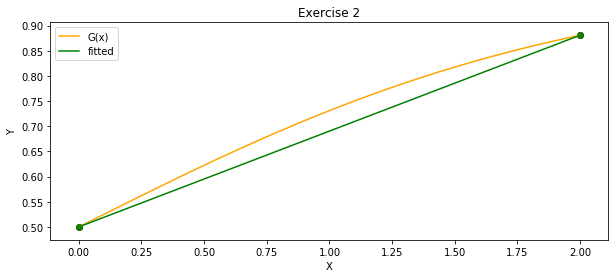

Exercise 2b:
Net(
  (hidden1): Linear(in_features=1, out_features=4, bias=True)
  (predict): Linear(in_features=4, out_features=1, bias=True)
)
training the network...


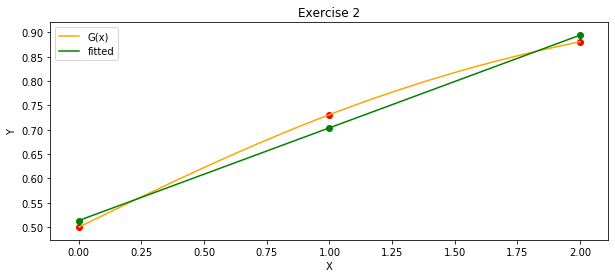

Exercise 2c:
Net(
  (hidden1): Linear(in_features=1, out_features=16, bias=True)
  (predict): Linear(in_features=16, out_features=1, bias=True)
)
training the network...


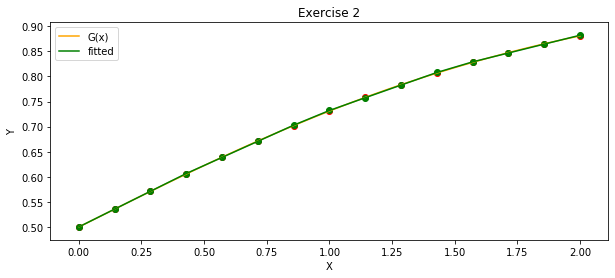

In [181]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

'''Define any function to be used as input'''
gx = lambda x: 1 / (1 + np.exp(-x))
#gx = lambda x: np.sin(2 * np.pi * x)

def get_n_data_points(gx, start, end, num_points, x=None):
    '''Either pass num_points to use linspace to sample, 
       or x can be passed manually to override with selected points'''
    if not x:
      x = torch.unsqueeze(torch.linspace(start, end, num_points), dim=1)
    y = torch.unsqueeze(torch.from_numpy(np.array([gx(x[i]) for i in range(len(x))])), dim=1)
    return x, y

def get_plotting_points(gx, start, end, num_points, x=None):
    '''This function gets say 500 points to plot the function g(x) on the graph'''
    x = torch.unsqueeze(torch.linspace(start, end, 500), dim=1)
    y = torch.unsqueeze(torch.from_numpy(np.array([gx(x[i]) for i in range(len(x))])), dim=1)
    return x, y


#2 layer Neural Network with a one hidden layer
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden1, n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1)
        self.predict = torch.nn.Linear(n_hidden1, n_output)
  
    def forward(self, x):
        x = F.relu(self.hidden1(x)) # ReLU activation
        x = self.predict(x)
        return x

def piecewise_linear(gx, start, end, num_points):
    x, y = get_n_data_points(gx, start=start, end=end, num_points=num_points)
    x, y = Variable(x), Variable(y)
    #width = num + 1
    net = Net(n_feature=1, n_hidden1=num_points+1, n_output=1)#.cuda()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
    loss_func = torch.nn.MSELoss()
    print(net)
    print('training the network...')
    for epoch in range(1, 10000):
        net.train()
        optimizer.zero_grad()
        pred = net(x)
        loss = loss_func(pred, y)
        loss.backward()
        optimizer.step()

    y_pred = net(x)
    p_x, p_y = get_plotting_points(gx, start, end, 100, x=None)
      
    # view data
    plt.figure(figsize=(10,4))
    plt.plot(p_x.data.numpy(), p_y.data.numpy(), color = "orange", label='''G(x)''')
    plt.scatter(x.data.numpy(), y.data.numpy(), color = "red")
    plt.scatter(x.data.numpy(), y_pred.data.numpy(), color = "green")
    plt.plot(x.data.numpy(), y_pred.data.numpy(), color = "green", label='''fitted''')
    plt.title('Exercise 2')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
    del net

def ex_2a():
    print('Exercise 2a:')
    piecewise_linear(gx, start=0, end=2, num_points=2)

def ex_2b():
    print('Exercise 2b:')
    piecewise_linear(gx, start=0, end=2, num_points=3)

def ex_2c():
    print('Exercise 2c:')
    piecewise_linear(gx, start=0, end=2, num_points=15)


ex_2a()
ex_2b()
ex_2c()


### Let's try piecewise interpolation on different g(x)'s to validate our result


Net(
  (hidden1): Linear(in_features=1, out_features=16, bias=True)
  (predict): Linear(in_features=16, out_features=1, bias=True)
)
training the network...


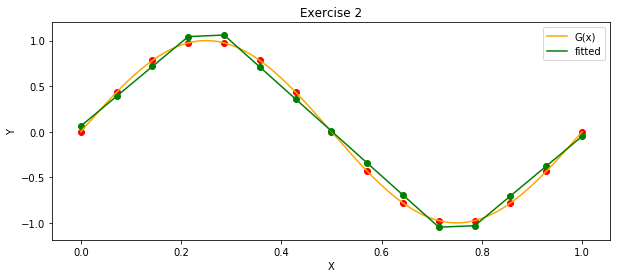

Net(
  (hidden1): Linear(in_features=1, out_features=16, bias=True)
  (predict): Linear(in_features=16, out_features=1, bias=True)
)
training the network...


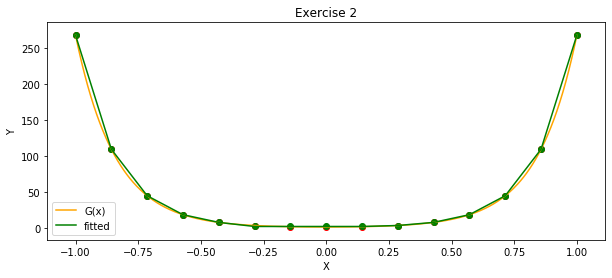

In [183]:
gx = lambda x: np.sin(2 * np.pi * x)
piecewise_linear(gx, start=0, end=1, num_points=15)

gx = lambda x: np.cosh(2 * np.pi * x)
piecewise_linear(gx, start=-1, end=1, num_points=15)


## Exercise 3

**4-CNN MODEL**: We are uing a model with 4 layers of Convolutions with Batch Normalization and Dropout, followed by two fully connected layers. Along with Data Augumentation, we acheive an accuracy of 93.1%


In [77]:
from torch.optim.lr_scheduler import ReduceLROnPlateau, StepLR
from torchvision import datasets
from torch.utils.data import DataLoader
import torch
from torch import nn
from torchvision import transforms
import torch.nn.functional as F
from torch import optim
import numpy as np
from tqdm import tnrange, tqdm_notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


epochs=35
batch_size=256
learning_rate=0.001
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#prep dataset
trans = transforms.Compose([
                            #transforms.RandomCrop(28, padding=4),
                            #transforms.RandomRotation(degrees=(15,-15)),
                            transforms.RandomHorizontalFlip(p=0.5),
                            transforms.RandomPerspective(distortion_scale=0.2, p=0.2),
                            transforms.ToTensor(), 
                            transforms.Normalize((0.3536915,), (0.3907847,)),
                            ])
trans1 = transforms.Compose([ 
                            transforms.ToTensor(), 
                            transforms.Normalize((0.3536915,), (0.3907847,)),
                            ])
training_set = datasets.FashionMNIST('data', train=True, download=True, transform=trans)
testing_set = datasets.FashionMNIST('data', train=False, download=True, transform=trans1)
train_data = DataLoader(training_set, shuffle=True, batch_size=batch_size)
test_data = DataLoader(testing_set, shuffle=False, batch_size=batch_size)



#model definition
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            #nn.Dropout(0.2),
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            #nn.Dropout(0.2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),
        )

        self.fc1 = nn.Sequential(
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2)
        )

        self.fc2 = nn.Linear(64, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out


def weights_init(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)
        torch.nn.init.zeros_(m.bias)


net = CNN()
if torch.cuda.is_available():
    net = CNN().cuda()    
net.apply(weights_init)
cal_loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)
#scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=10, verbose=True, min_lr = 0.0001)

print(net)


CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.2, inplace=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, af

In [78]:
###training the model

train_acc = list()
train_loss_list = list()
test_acc = list()
test_loss_list = list()
lr_list = list()

for epoch in range(1, epochs+1):
    print ("Epoch {}".format(epoch))
    running_loss = 0
    training_accuracy = 0
    net.train()
    for img, lbl in train_data:
        img, lbl = img.to(device), lbl.to(device)
        optimizer.zero_grad()
        score = net(img)
        loss = cal_loss(score, lbl)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.detach().cpu().numpy()
        training_accuracy += (score.argmax(dim=1)==lbl).sum().cpu().numpy()
    #scheduler.step(0)
    print('LR = ', optimizer.param_groups[0]['lr'])

    test_running_loss = 0
    test_accuracy = 0
    net.eval()
    with torch.no_grad():
        for img,lbl in test_data:
            img,lbl = img.to(device), lbl.to(device)
            score = net(img)
            loss = cal_loss(score, lbl)
            test_running_loss += loss.detach().cpu().numpy()
            test_accuracy += (score.argmax(dim=1)==lbl).sum().cpu().numpy()

    train_loss = running_loss/len(train_data)
    test_loss = test_running_loss/len(test_data)
    training_accuracy /= len(training_set)
    test_accuracy /= len(testing_set)
    train_acc.append(training_accuracy)
    train_loss_list.append(train_loss)
    test_acc.append(test_accuracy)
    test_loss_list.append(test_loss)
    lr_list.append(optimizer.param_groups[0]['lr'])

    print('    loss     (train, test): {:.4f},  {:.4f}'.format(train_loss, test_loss))
    print('    accuracy (train, test): {:.4f},  {:.4f}'.format(training_accuracy, test_accuracy)) 
    
    if epoch in [13, 18, 21, 23, 25, 27, 39, 30, 31]:
        optimizer.param_groups[0]['lr'] = optimizer.param_groups[0]['lr']/2


Epoch 1


LR =  0.01
    loss     (train, test): 0.5872,  0.3897
    accuracy (train, test): 0.7842,  0.8606
Epoch 2


LR =  0.01
    loss     (train, test): 0.3833,  0.3364
    accuracy (train, test): 0.8601,  0.8774
Epoch 3


LR =  0.01
    loss     (train, test): 0.3460,  0.2891
    accuracy (train, test): 0.8763,  0.8973
Epoch 4


LR =  0.01
    loss     (train, test): 0.3189,  0.2816
    accuracy (train, test): 0.8849,  0.8981
Epoch 5


LR =  0.01
    loss     (train, test): 0.3038,  0.2848
    accuracy (train, test): 0.8918,  0.8961
Epoch 6


LR =  0.01
    loss     (train, test): 0.2876,  0.2628
    accuracy (train, test): 0.8979,  0.9040
Epoch 7


LR =  0.01
    loss     (train, test): 0.2809,  0.2619
    accuracy (train, test): 0.8990,  0.9066
Epoch 8


LR =  0.01
    loss     (train, test): 0.2739,  0.2562
    accuracy (train, test): 0.9008,  0.9026
Epoch 9


LR =  0.01
    loss     (train, test): 0.2633,  0.2506
    accuracy (train, test): 0.9049,  0.9052
Epoch 10


LR =  0.01
    loss     (train, test): 0.2576,  0.2420
    accuracy (train, test): 0.9075,  0.9104
Epoch 11


LR =  0.01
    loss     (train, test): 0.2547,  0.2500
    accuracy (train, test): 0.9071,  0.9086
Epoch 12


LR =  0.01
    loss     (train, test): 0.2472,  0.2568
    accuracy (train, test): 0.9109,  0.9051
Epoch 13


LR =  0.01
    loss     (train, test): 0.2448,  0.2350
    accuracy (train, test): 0.9123,  0.9114
Epoch 14


LR =  0.005
    loss     (train, test): 0.2213,  0.2123
    accuracy (train, test): 0.9196,  0.9201
Epoch 15


LR =  0.005
    loss     (train, test): 0.2142,  0.2143
    accuracy (train, test): 0.9216,  0.9202
Epoch 16


LR =  0.005
    loss     (train, test): 0.2123,  0.2192
    accuracy (train, test): 0.9227,  0.9176
Epoch 17


LR =  0.005
    loss     (train, test): 0.2102,  0.2054
    accuracy (train, test): 0.9234,  0.9218
Epoch 18


LR =  0.005
    loss     (train, test): 0.2069,  0.2121
    accuracy (train, test): 0.9250,  0.9205
Epoch 19


LR =  0.0025
    loss     (train, test): 0.1941,  0.2070
    accuracy (train, test): 0.9281,  0.9256
Epoch 20


LR =  0.0025
    loss     (train, test): 0.1908,  0.2006
    accuracy (train, test): 0.9315,  0.9284
Epoch 21


LR =  0.0025
    loss     (train, test): 0.1869,  0.1981
    accuracy (train, test): 0.9312,  0.9277
Epoch 22


LR =  0.00125
    loss     (train, test): 0.1822,  0.1949
    accuracy (train, test): 0.9345,  0.9305
Epoch 23


LR =  0.00125
    loss     (train, test): 0.1804,  0.1956
    accuracy (train, test): 0.9343,  0.9294
Epoch 24


LR =  0.000625
    loss     (train, test): 0.1754,  0.1950
    accuracy (train, test): 0.9355,  0.9294
Epoch 25


LR =  0.000625
    loss     (train, test): 0.1744,  0.1928
    accuracy (train, test): 0.9367,  0.9307
Epoch 26


LR =  0.0003125
    loss     (train, test): 0.1730,  0.1925
    accuracy (train, test): 0.9369,  0.9302
Epoch 27


LR =  0.0003125
    loss     (train, test): 0.1710,  0.1935
    accuracy (train, test): 0.9378,  0.9304
Epoch 28


LR =  0.00015625
    loss     (train, test): 0.1696,  0.1923
    accuracy (train, test): 0.9379,  0.9299
Epoch 29


LR =  0.00015625
    loss     (train, test): 0.1697,  0.1930
    accuracy (train, test): 0.9385,  0.9316
Epoch 30


LR =  0.00015625
    loss     (train, test): 0.1686,  0.1925
    accuracy (train, test): 0.9387,  0.9318
Epoch 31


LR =  7.8125e-05
    loss     (train, test): 0.1683,  0.1924
    accuracy (train, test): 0.9392,  0.9314
Epoch 32


LR =  3.90625e-05
    loss     (train, test): 0.1690,  0.1920
    accuracy (train, test): 0.9389,  0.9320
Epoch 33


LR =  3.90625e-05
    loss     (train, test): 0.1693,  0.1919
    accuracy (train, test): 0.9391,  0.9313
Epoch 34


LR =  3.90625e-05
    loss     (train, test): 0.1668,  0.1917
    accuracy (train, test): 0.9386,  0.9318
Epoch 35


LR =  3.90625e-05
    loss     (train, test): 0.1671,  0.1924
    accuracy (train, test): 0.9383,  0.9310


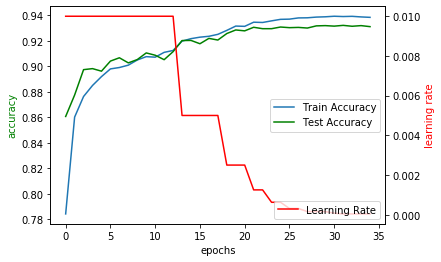

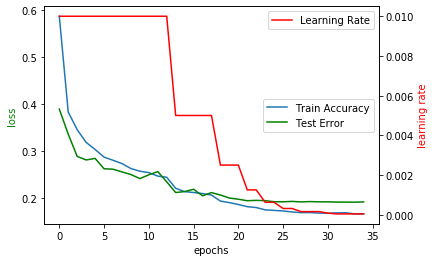

In [79]:
#Some plots

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel('epochs')
ax1.plot(pd.Series(train_acc), label='Train Accuracy')
ax1.plot(pd.Series(test_acc), color='green', label='Test Accuracy')
ax1.set_ylabel('accuracy', color='green')
ax2 = ax1.twinx()
ax2.plot(pd.Series(lr_list), color='r', label='Learning Rate')
ax2.set_ylabel('learning rate', color='r')
ax1.legend(loc=7)
ax2.legend(loc=4)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel('epochs')
ax1.plot(pd.Series(train_loss_list), label='Train Accuracy')
ax1.plot(pd.Series(test_loss_list), color='green', label='Test Error')
ax1.set_ylabel('loss', color='green')
ax2 = ax1.twinx()
ax2.plot(pd.Series(lr_list), color='r', label='Learning Rate')
ax2.set_ylabel('learning rate', color='r')
ax1.legend(loc=7)
ax2.legend(loc=1)
